In [6]:
# Imports 
import os
import random
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gen import generate_data

from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.autograd import grad

# Reproductibilité 
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# Device (GPU/CPU) 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f" Using device: {device}")


 Using device: cpu


In [7]:
params = dict(
    tau=1e-11,          # s
    fluence=300.0,      # J/m^2
    wavelength=400e-9,  # m
    t_end=40e-12,       # s
    steps_per_tau=20
)

time, Te, Ti, Tw, sigma_abs = generate_data(**params)

print(f"sigma_abs = {sigma_abs:.3e} m^2")
print(f"points = {len(time)}, dt = {time[1]-time[0]:.3e} s")

data = pd.DataFrame({
    "time_s": time,
    "T_e_K": Te,
    "T_l_K": Ti,
    "T_w_K": Tw,
})
data.head()

sigma_abs = 7.786e-18 m^2
points = 80, dt = 5.000e-13 s


,time_s,T_e_K,T_l_K,T_w_K
0,0.000000e+00,300.000000,300.000000,300.0
1,5.000000e-13,518.288109,300.000000,300.0
2,1.000000e-12,473.272481,302.425423,300.0
3,1.500000e-12,527.104327,304.323724,300.0
4,2.000000e-12,583.941867,306.799064,300.0


# visualisation

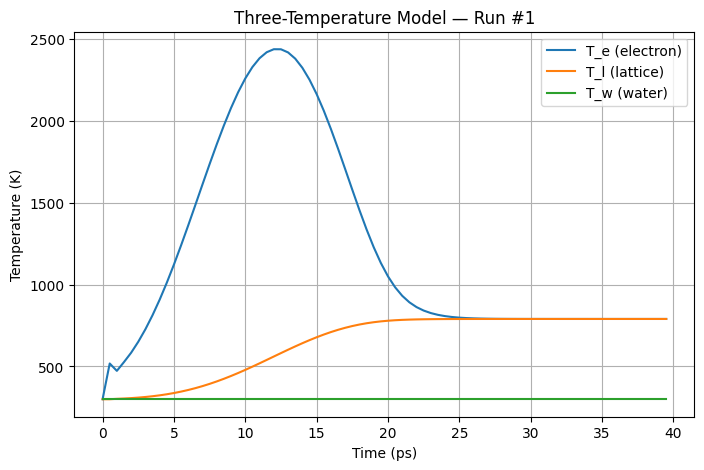

In [8]:
plt.figure(figsize=(8,5))
plt.plot(data["time_s"]/1e-12, data["T_e_K"], label="T_e (electron)")
plt.plot(data["time_s"]/1e-12, data["T_l_K"], label="T_l (lattice)")
plt.plot(data["time_s"]/1e-12, data["T_w_K"], label="T_w (water)")
plt.xlabel("Time (ps)")
plt.ylabel("Temperature (K)")
plt.title("Three-Temperature Model — Run #1")
plt.grid(True); plt.legend(); plt.show()
